# Experiment with CellList implementation for AdResS

**Problem**: different values of Energy for non-bonded interaction calculated for the same coonfiguration

**Configuration**

Four atomistic particles organized in square of $a=2.0\sigma$ put into one coarse-grained bead form a single group. Two groups are put inside box of length $10\sigma$ with the distance between coarse-grained bead of $d=3.0\sigma$. 

In the case of *AdResS* all of the particles have $\lambda=1.0$ (atomistic resolution).

**Normal mode**

The cells contains atomistic particles, there is no issue.

** AdResS mode **

The cells contains only coarse-grained particles. Atomistic particles are on hash table indexes by coarse-grained bead. 


In [21]:
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

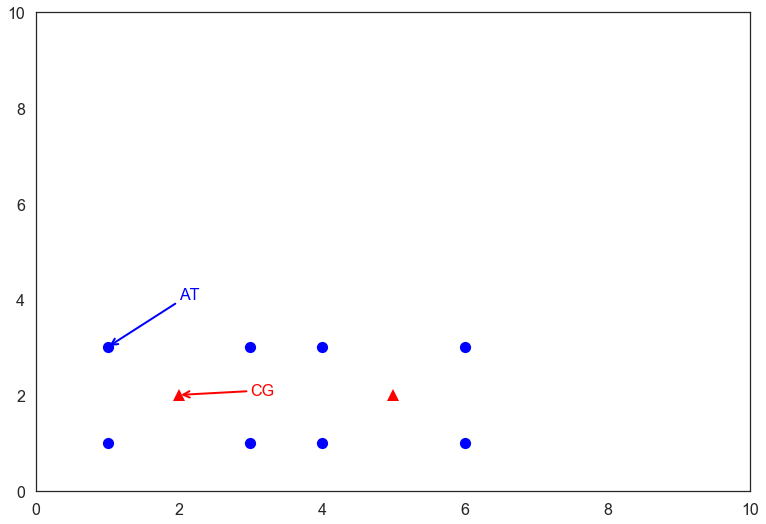

In [22]:
from matplotlib import pyplot as plt
particles = [
    (1, espressopp.Real3D(2.0, 2.0, 1.0), 20.0, 0, 0.0, 1, 1.0, 1.0),
    (2, espressopp.Real3D(1.0, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (3, espressopp.Real3D(3.0, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (4, espressopp.Real3D(3.0, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (5, espressopp.Real3D(1.0, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (6, espressopp.Real3D(2.0+group_distance, 2.0, 1.0), 20.0, 0, 0.0, 1, 1.0, 1.0),
    (7, espressopp.Real3D(1.0+group_distance, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (8, espressopp.Real3D(3.0+group_distance, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (9, espressopp.Real3D(3.0+group_distance, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (10, espressopp.Real3D(1.0+group_distance, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
]
plt.plot([x[1][0] for x in particles if x[3] == 1], [x[1][1] for x in particles if x[3] == 1], 'bo')
plt.plot([x[1][0] for x in particles if x[3] == 0], [x[1][1] for x in particles if x[3] == 0], 'r^')
plt.xlim([0.0, 10.0])
plt.ylim([0.0, 10.0])
plt.annotate("AT", xy=(1.0, 3.0), xycoords='data', color='b', xytext=(2.0, 4.0), fontsize=16, textcoords='data', arrowprops=dict(arrowstyle="->", color='b', connectionstyle="arc3", linewidth=2.0))
plt.annotate("CG", xy=(2.0, 2.0), xycoords='data', color='r', xytext=(3.0, 2.0), fontsize=16, textcoords='data', arrowprops=dict(arrowstyle="->", color='r', connectionstyle="arc3", linewidth=2.0))

(7, 7, 7)
===== ENERGY =====
Adr 0.0 AT 1.78193057517


=== PAIRS ADRESS ===
AT pairs


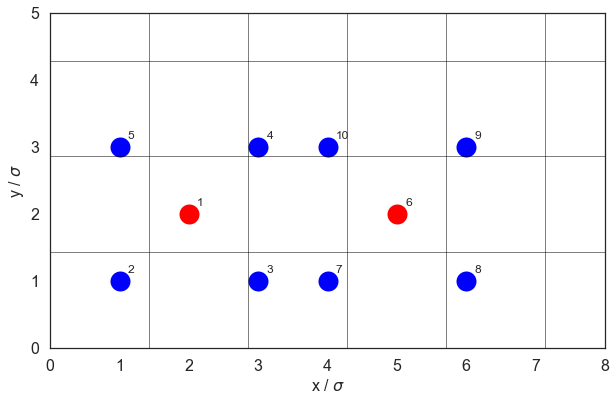

In [29]:
import sys
sys.path.append('/home/jakub/project/sim-espressopp')

import espressopp  # NOQA
import math  # NOQA

from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (9, 6)
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 20
rcParams['axes.titlesize'] = 20

dt = 0.001

box = (10.0, 10.0, 10.0)
cutoff = 1.2
skin = 0.1

# espressopp.PLogger.set('VerletList', 'DEBUG')
# logging.getLogger().setLevel(logging.DEBUG)
# AdResS system
system = espressopp.System()
system.rng = espressopp.esutil.RNG(12345)
system.bc = espressopp.bc.OrthorhombicBC(system.rng, box)
system.skin = skin
nodeGrid = espressopp.Int3D(1, 1, 1)
cellGrid = espressopp.Int3D(7, 7, 7)

system.storage = espressopp.storage.DomainDecompositionAdress(system, nodeGrid, cellGrid,
                                                              nocheck=True)

print system.storage.getCellGrid()

integrator = espressopp.integrator.VelocityVerlet(system)
integrator.dt = dt

# Particle configurations
part_prop = ('id', 'pos', 'mass', 'adrat', 'q', 'type', 'lambda_adr', 'radius')
group_distance = 3.0
particles = [
    (1, espressopp.Real3D(2.0, 2.0, 1.0), 20.0, 0, 0.0, 1, 1.0, 1.0),  ## CG
    (2, espressopp.Real3D(1.0, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (3, espressopp.Real3D(3.0, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (4, espressopp.Real3D(3.0, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (5, espressopp.Real3D(1.0, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (6, espressopp.Real3D(2.0+group_distance, 2.0, 1.0), 20.0, 0, 0.0, 1, 1.0, 1.0),  ## CG
    (7, espressopp.Real3D(1.0+group_distance, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (8, espressopp.Real3D(3.0+group_distance, 1.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (9, espressopp.Real3D(3.0+group_distance, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
    (10, espressopp.Real3D(1.0+group_distance, 3.0, 1.0), 5.0, 1, 5.0, 2, 1.0, 0.5),
]

at_particles = [
    (1, espressopp.Real3D(1.0, 1.0, 1.0),                5.0, 0, 5.0, 2, 1.0, 0.5),
    (2, espressopp.Real3D(3.0, 1.0, 1.0),                5.0, 0, 5.0, 2, 1.0, 0.5),
    (3, espressopp.Real3D(3.0, 3.0, 1.0),                5.0, 0, 5.0, 2, 1.0, 0.5),
    (4, espressopp.Real3D(1.0, 3.0, 1.0),                5.0, 0, 5.0, 2, 1.0, 0.5),
    (5, espressopp.Real3D(1.0+group_distance, 1.0, 1.0), 5.0, 0, 5.0, 2, 1.0, 0.5),
    (6, espressopp.Real3D(3.0+group_distance, 1.0, 1.0), 5.0, 0, 5.0, 2, 1.0, 0.5),
    (7, espressopp.Real3D(3.0+group_distance, 3.0, 1.0), 5.0, 0, 5.0, 2, 1.0, 0.5),
    (8, espressopp.Real3D(1.0+group_distance, 3.0, 1.0), 5.0, 0, 5.0, 2, 1.0, 0.5),
]

# Plot points
plt.plot([x[1][0] for x in particles if x[3] == 1], [x[1][1] for x in particles if x[3] == 1], 'bo', markersize=20)
plt.plot([x[1][0] for x in particles if x[3] == 0], [x[1][1] for x in particles if x[3] == 0], 'ro', markersize=20)
plt.xlim([0.0, 10.0])
plt.ylim([0.0, 10.0])
plt.xticks(range(0, 11))
plt.yticks(range(0, 11))
for p in particles:
    plt.annotate(str(p[0]), xy=(p[1][0]+0.12, p[1][1]+0.12), fontsize=12)

# for p in at_particles:
#     plt.annotate(str(p[0]), xy=(p[1][0]+0.1, p[1][1]-0.2), fontsize=12)
    

system.storage.addParticles(particles, *part_prop)

ftpl = espressopp.FixedTupleListAdress(system.storage)
ftpl.addTuples([(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)])
system.storage.setFixedTuplesAdress(ftpl)
system.storage.decompose()

vl = espressopp.VerletListAdress(
    system,
    cutoff=cutoff,
    adrcut=cutoff,
    dEx=100.0,
    dHy=0.0,
    adrCenter=[5.0, 0.0, 0.0]
)
adress = espressopp.integrator.Adress(system, vl, ftpl)
integrator.addExtension(adress)

lj = espressopp.interaction.LennardJones(sigma=1.0, epsilon=1.0, cutoff=cutoff)
lj_int = espressopp.interaction.VerletListAdressLennardJones(vl, ftpl)
lj_int.setPotentialAT(type1=2, type2=2, potential=lj)
integrator.run(0)

# Now standard atomistic system.
system_aa = espressopp.System()
system_aa.rng = espressopp.esutil.RNG(12345)
system_aa.bc = espressopp.bc.OrthorhombicBC(system_aa.rng, box)
system_aa.skin = skin

system_aa.storage = espressopp.storage.DomainDecomposition(system_aa, nodeGrid, cellGrid, nocheck=True)

system_aa.storage.addParticles(at_particles, *part_prop)
system_aa.storage.decompose()
vl_aa = espressopp.VerletList(system_aa, cutoff=cutoff)
lj = espressopp.interaction.LennardJones(sigma=1.0, epsilon=1.0, cutoff=cutoff)
lj_int_aa = espressopp.interaction.VerletListLennardJones(vl_aa)
lj_int_aa.setPotential(type1=2, type2=2, potential=lj)

Elj = lj_int.computeEnergy()
Elj_aa = lj_int_aa.computeEnergy()
print "===== ENERGY ====="
print 'Adr', Elj, 'AT', Elj_aa
print ""
print ""

print('=== PAIRS ADRESS ===')
print('AT pairs')
# pairs = vl.getAllAdrPairs()[0]
# print pairs
# for p1, p2 in pairs:
#     pt1 = system.storage.getParticle(p1)
#     pt2 = system.storage.getParticle(p2)
#     d = pt2.pos - pt1.pos
#     print p1, pt1.pos, p2, pt2.pos, d.abs()
# print('CG pairs')
# pairs = vl.getAllCGPairs()[0]
# print pairs
# for p1, p2 in pairs:
#     pt1 = system.storage.getParticle(p1)
#     pt2 = system.storage.getParticle(p2)
#     d = pt2.pos - pt1.pos
#     print p1, pt1.pos, p2, pt2.pos, d.abs()
# print ""
# print('=== Pairs atomistic ===')
# pairs = vl_aa.getAllPairs()[0]
# print pairs
# for p1, p2 in pairs:
#     pt1 = system_aa.storage.getParticle(p1)
#     pt2 = system_aa.storage.getParticle(p2)
#     d = pt2.pos - pt1.pos
#     print p1, pt1.pos, p2, pt2.pos, d.abs()
# print ""

# Draw grid
dg = 10.0 / cellGrid[0]
for x in range(0, cellGrid[0]+1):
    plt.axvline(x=dg*x+dg, linewidth=0.5, color='k')
for x in range(0, cellGrid[1]+1):
    plt.axhline(y=dg*x+dg, linewidth=0.5, color='k')
plt.xlabel(r'x / $\sigma$', fontsize=16)
plt.ylabel(r'y / $\sigma$', fontsize=16)
plt.ylim([0, 5])
plt.xlim([0, 8])
plt.tight_layout()
plt.savefig('cell_adress_problem.pdf', dpi=200, tight_layout=True)